In [2]:
import os

#os.chdir(r'C:\Users\carlo\GitHub\ProjectBuffalo')

os.chdir(r'/Users/ruiyang/Desktop/CSC2516projectgit/ProjectBuffalo')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\carlo\\GitHub\\ProjectBuffalo'

In [2]:
import pandas as pd
import numpy as np
import buffalo.algorithm.outliers as ol_algo 

In [3]:
import matplotlib.pyplot as plt

In [4]:
from statsmodels.tsa.api import ArmaProcess

In [5]:
armaprocess = ArmaProcess(ar=np.array([0.75]), ma=np.array([0.23]))

In [6]:
obs = armaprocess.generate_sample(5000)

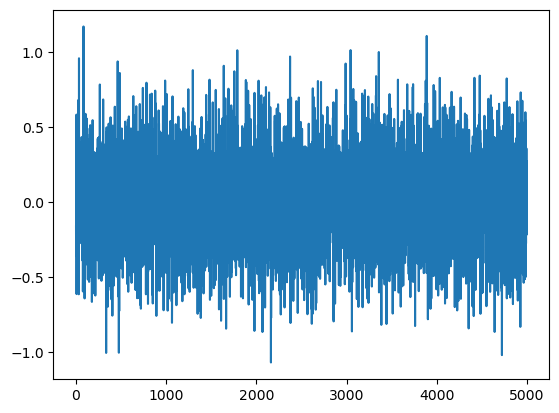

In [7]:
plt.plot(obs)

In [8]:
def add_outliers(obs, ol_info):
    obs = obs.copy()
    added = []
    for i in range(len(ol_info.index)):
        position = np.random.choice(range(len(obs)), ol_info.iloc[i]['Num'])
        effect = np.random.normal(ol_info.iloc[i]['effect_mean'], ol_info.iloc[i]['effect_std'], ol_info.iloc[i]['Num'])
        if ol_info.iloc[i]['type'] == 'AO':
            obs[position] += effect
        added.append(pd.merge(
            pd.DataFrame({'position': position, 'effect': effect}),
            ol_info,
            how='cross'
        ))
    return obs, pd.concat(added, axis=0)

In [9]:
ol_type = pd.DataFrame({
    'type': ['AO'],
    'Num': [100],
    'effect_mean': [20],
    'effect_std': [4]
})

In [10]:
ol_obs, ol_info = add_outliers(obs.copy(), ol_type)

In [1]:
ol_info

NameError: name 'ol_info' is not defined

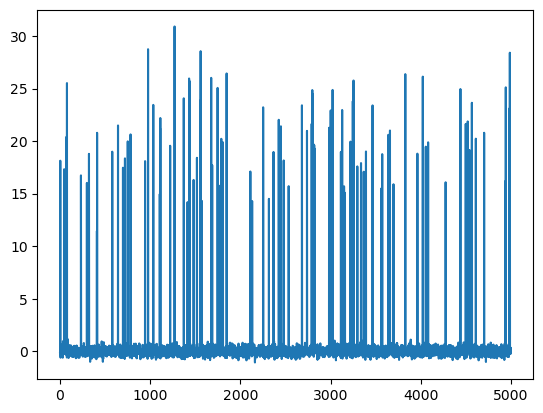

In [11]:
plt.plot(ol_obs)

In [12]:
ol_detection = ol_algo.IterativeTtestOutlierDetection(
    types= pd.DataFrame({'type': ['AO']}),
    maxit=2,
    maxit_iloop=4,
    maxit_oloop=4,
    cval=None,
    cval_reduce=0.14286,
    discard_method='en-masse',
    discard_cval=None,
    tsmethod='ARIMA',
    args_tsmethod={
        "order": (1,0,1),
        "seasonal_order": (0, 0, 0, 0),
        "with_intercept": False
    }
)

In [13]:
result, endog, exog = ol_detection.fit(endog=pd.DataFrame(ol_obs)[0], exog=None)

/Users/ruiyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ruiyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ruiyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ruiyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible start

In [20]:
result

,type_id,id,type,residuals,t_index,coefhat,tstat,delta,min_n
0,0,0,AO,18.134459,4,18.1228,1510.233333,NaN,NaN
1,0,1,AO,17.200191,47,17.3235,1732.350000,NaN,NaN
2,0,3,AO,20.053894,69,20.7677,82.739841,NaN,NaN
3,0,4,AO,25.108471,78,25.5164,1500.964706,NaN,NaN
4,0,5,AO,16.428150,233,16.7316,2390.228571,NaN,NaN
...,...,...,...,...,...,...,...,...,...
0,0,103,AO,19.821015,68,19.8233,4955.825000,NaN,NaN
1,0,104,AO,1.185477,84,1.1737,234.740000,NaN,NaN
2,0,105,AO,1.099310,3889,1.1089,1108.900000,NaN,NaN
3,0,106,AO,20.798447,4566,20.8014,5200.350000,NaN,NaN


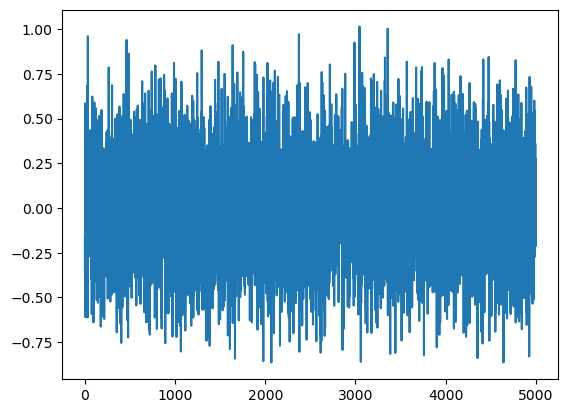

In [15]:
plt.plot(endog)

## Apple Outlier Detection

In [16]:
csv_path ='/Users/ruiyang/Desktop/CSC2516projectgit/ProjectBuffalo/example/data/stock'
df = pd.read_csv(csv_path + '/AAPL.csv')
df = df.iloc[:1000]
df

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2023-03-10,150.210,150.9400,147.610,148.50,148.500000,68448609,0.0,1.0
1,2023-03-09,153.559,154.5350,150.225,150.59,150.590000,53833582,0.0,1.0
2,2023-03-08,152.810,153.4700,151.830,152.87,152.870000,47204791,0.0,1.0
3,2023-03-07,153.700,154.0299,151.130,151.60,151.600000,56182028,0.0,1.0
4,2023-03-06,153.785,156.3000,153.460,153.83,153.830000,87558028,0.0,1.0
...,...,...,...,...,...,...,...,...,...
995,2019-03-28,188.950,189.5600,187.530,188.72,45.602219,20780363,0.0,1.0
996,2019-03-27,188.750,189.7600,186.550,188.47,45.541809,29848427,0.0,1.0
997,2019-03-26,191.660,192.8800,184.580,186.79,45.135854,49800538,0.0,1.0
998,2019-03-25,191.510,191.9800,186.600,188.74,45.607051,43845293,0.0,1.0


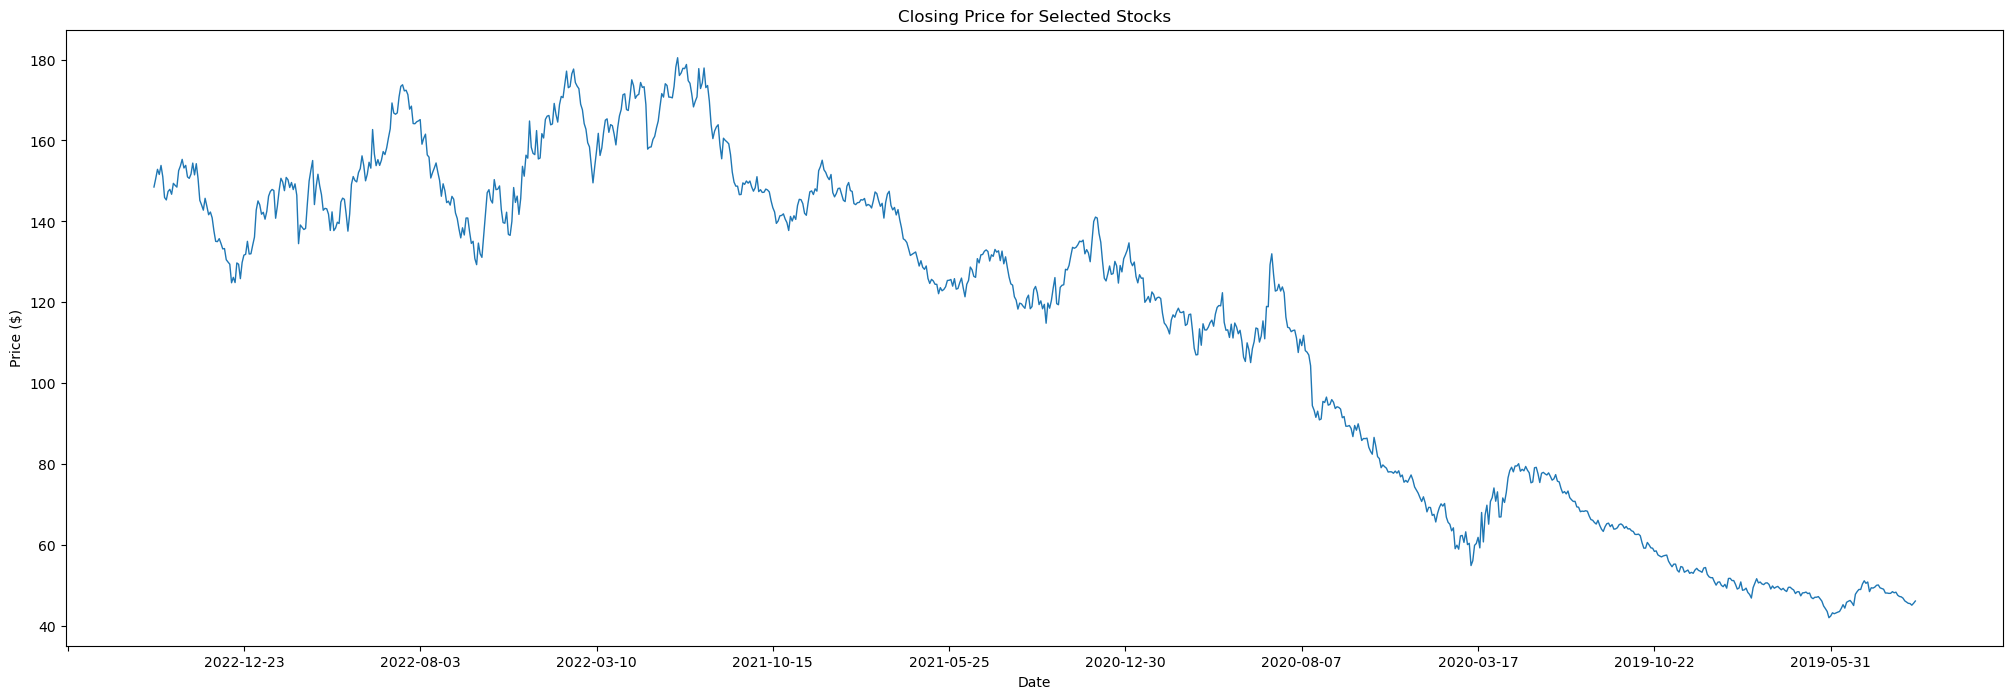

In [17]:
# Plot the closing price for each stock
import matplotlib.dates as mdates
# set the interval to show every 7th day
interval = 100

fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(df['timestamp'], df['adjusted_close'], linewidth=1)
ax.set_title('Closing Price for Selected Stocks')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')

# set the x-axis interval
ax.xaxis.set_major_locator(mdates.DayLocator(interval=interval))

plt.show()

In [18]:
df['adjusted_close']

0      148.500000
1      150.590000
2      152.870000
3      151.600000
4      153.830000
          ...    
995     45.602219
996     45.541809
997     45.135854
998     45.607051
999     46.165239
Name: adjusted_close, Length: 1000, dtype: float64

In [19]:
result_appl, endog_appl, exog_appl = ol_detection.fit(endog=df['adjusted_close'], exog=None)

/Users/ruiyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/tools.py:538: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)
/Users/ruiyang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ValueError: xnames and params do not have the same length

In [22]:
result = result.reset_index(drop=True)
result

,type_id,id,type,residuals,t_index,coefhat,tstat,delta,min_n
0,0,0,AO,18.134459,4,18.1228,1510.233333,NaN,NaN
1,0,1,AO,17.200191,47,17.3235,1732.350000,NaN,NaN
2,0,3,AO,20.053894,69,20.7677,82.739841,NaN,NaN
3,0,4,AO,25.108471,78,25.5164,1500.964706,NaN,NaN
4,0,5,AO,16.428150,233,16.7316,2390.228571,NaN,NaN
...,...,...,...,...,...,...,...,...,...
100,0,103,AO,19.821015,68,19.8233,4955.825000,NaN,NaN
101,0,104,AO,1.185477,84,1.1737,234.740000,NaN,NaN
102,0,105,AO,1.099310,3889,1.1089,1108.900000,NaN,NaN
103,0,106,AO,20.798447,4566,20.8014,5200.350000,NaN,NaN


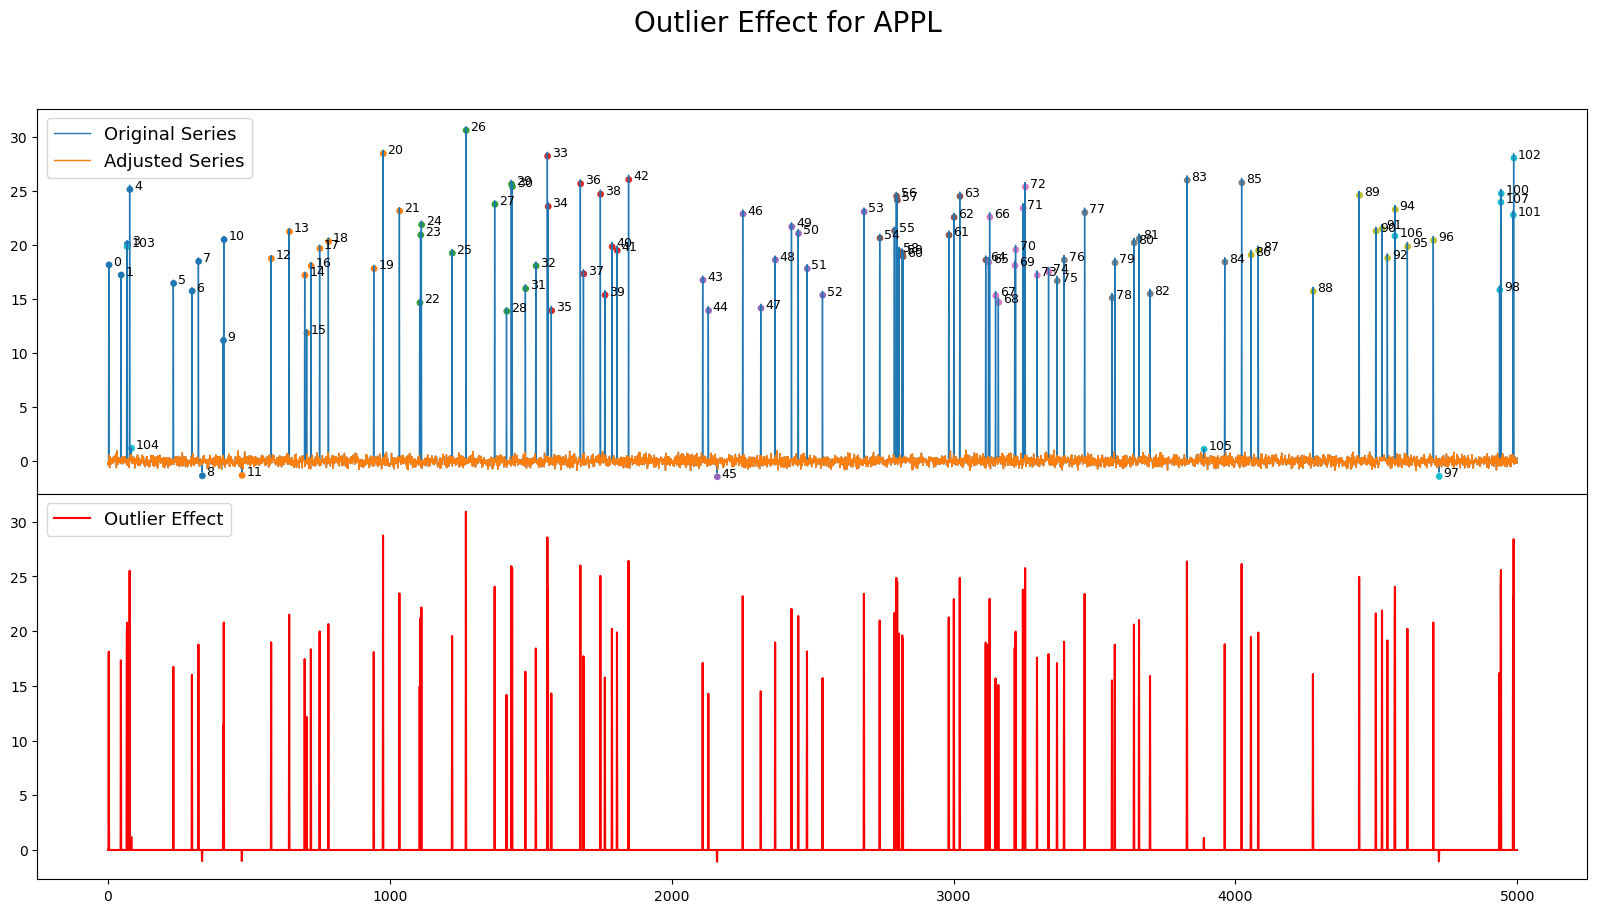

In [45]:
fig, axs = plt.subplots(2,1,figsize=(20,10), gridspec_kw={'height_ratios': [1, 1]})
fig.suptitle('Outlier Effect for APPL', size=20)
axs[0].plot(ol_obs, linewidth=1, label = 'Original Series')
axs[0].plot(endog, linewidth=1, label = 'Adjusted Series')
axs[0].scatter(result['t_index'], result['residuals'], c=result.id, cmap='tab10',  marker='o', s=15)
for i, txt in enumerate(result['id']):
    axs[0].annotate(txt, (result['t_index'][i]+15, result['residuals'][i]), fontsize=9)
axs[0].get_xaxis().set_visible(False)
axs[0].legend(loc='upper left', prop={'size': 13})

outlier_effect =  ol_obs - endog
axs[1].plot((outlier_effect), c='r', label = 'Outlier Effect')
axs[1].legend(loc='upper left', prop={'size': 13})
plt.subplots_adjust(wspace=0, hspace=0)